In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import ndimage as nd
from scipy import signal as sg
from skimage import data
from skimage.util import img_as_float
from skimage.filters import gabor_kernel

In [61]:
# root_dir of where the data is
root_dir = '../../data/'

# Location of images.
image_dir = root_dir + 'imags-512/'

# Location of where to write features.
feature_dir = root_dir + 'features/'

# The .csv file containing the image names and classes.
image_file = root_dir + 'image_names_classes.csv'

In [62]:
# Number of images.
n_images = 218

# Read image names and classes .csv file.
image_names_classes = pd.read_csv(image_file, header=None)

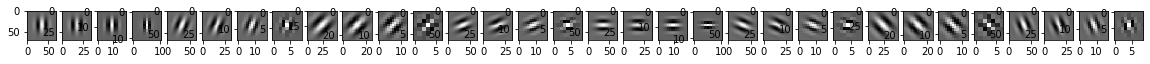

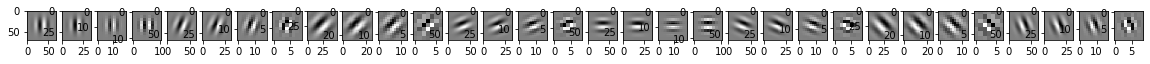

In [63]:
# prepare filter bank kernels
kernels = []
# EXPERIMENT WITH THE NUMBER OF ORIENTATIONS.
# MAKE SURE TO CHANGE THE FEATURE FILENAME BELOW TO INDICATE THE NUMBER OF ORIENTATIONS: Gabor_Y_X_.txt
# WHERE X IS THE NUMBER OF SCALES AND Y IS THE NUMBER OF ORIENTATIONS.
norientations = 8
for theta in range(norientations):
    theta = theta / norientations * np.pi
    # EXPERIMENT WITH THE NUMBER OF SCALES AND THE FREQUENCIES OF THE FILTERS.
    for frequency in (0.05 ,0.1, 0.20, 0.4): #(0.05,0.25, 0.5 ,0.1, 0.20, 0.4)
 #   for frequency in (0.05, 0.25):
        kernel = gabor_kernel(frequency, theta=theta)
        kernels.append(kernel)
        
fig, axs = plt.subplots(1, len(kernels), figsize=(20,20))
for k, kernel in enumerate(kernels):
    axs[k].imshow(np.real(kernel),cmap='gray')
    
fig, axs = plt.subplots(1, len(kernels), figsize=(20,20))
for k, kernel in enumerate(kernels):
    axs[k].imshow(np.imag(kernel),cmap='gray')


In [64]:
# Mean and standard deviation will be computed for each filter output.
fdim = 2 * len(kernels)

features = np.zeros((n_images, fdim))

In [65]:
def compute_feats(image, kernels):
    feats = np.zeros((len(kernels) * 2), dtype=np.double)
    for k, kernel in enumerate(kernels):
        filtered = sg.convolve(image, kernel)
        feats[2*k] = np.abs(filtered).mean()
        feats[2*k+1] = np.abs(filtered).std()
    return feats

In [66]:
# Extract features for each image.
for i in range(n_images):
    
    # Read the image.
    filename = image_dir + image_names_classes[0][i]    
    im = plt.imread(filename)
    
    # It turns out that the spectrogram images saved using plt.imsave have four channels
    # RGBA. The RGB channels are each equal to the grayscale value so we can use any of them.
    
    features[i, :] = compute_feats(im[:,:,0], kernels)
print(features)
    
# Save the features as a .csv file.
feature_filename = feature_dir + 'Gabor_4_6_512.txt'

np.savetxt(feature_filename, features, delimiter=',')

[[0.00347101 0.00688579 0.00650881 ... 0.00481144 0.00862884 0.00614735]
 [0.00344425 0.00681608 0.00568861 ... 0.00452873 0.00826535 0.00591405]
 [0.00321262 0.00668363 0.00560522 ... 0.004329   0.00801473 0.00577032]
 ...
 [0.0085905  0.01423359 0.01092551 ... 0.00650438 0.01165696 0.00811332]
 [0.00776488 0.01305605 0.00923794 ... 0.00643772 0.01119581 0.00801643]
 [0.00763419 0.01317025 0.00904806 ... 0.00626348 0.01098605 0.00786385]]
